<a href="https://colab.research.google.com/github/Jonathan-C-Barrett/GEOG5990M/blob/main/GEOG5003M_Final_Project_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GEOG5003M Final Assignment (Template)

Student ID number:

GitHub repo link:

Word count limit= 1,500 words max (markdown cells only, excluding readme)

# Read in Packages

In [ ]:
# read in required packages

import geopandas as gpd
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np

import matplotlib.pyplot as plt

!pip install mapclassify

# import the required machine learning packages
from sklearn import cluster
from sklearn.preprocessing import scale

# Data and Preprocessing

**HEALTH SERVICE ACCESS DATA**

In [ ]:
#Read in Health Services Data
ahah = pd.read_csv('https://github.com/Jonathan-C-Barrett/GEOG5990M/raw/refs/heads/main/ahah_v4.csv')
ahah.head()

In [ ]:
#Select only columns relating to Health Services
health = ahah[['LSOA21CD', 'ah4dent', 'ah4gp', 'ah4hosp', 'ah4phar', 'ah4leis', 'ah4h']]
health.head()

In [ ]:
#check for missing values
health.isna().sum()

**MEDIAN PROPERTY VALUE DATA**

In [ ]:
#Read in Median Property Price
m_value = pd.read_csv('https://github.com/Jonathan-C-Barrett/GEOG5990M/raw/refs/heads/main/land-registry-house-prices-Meidan-LSOA.csv')
m_value.head()

In [ ]:
#Select only columns relating to 2016
prop_16 = m_value[['Code', 'Area','Year ending Mar 2016','Year ending Jun 2016', 'Year ending Sep 2016', 'Year ending Dec 2016']]
prop_16.head()

In [ ]:
#examine property info for count and data type
prop_16.info()

In [ ]:
#check for missing values
prop_16.isna().sum()

In [ ]:
#create a column of mean year value to counter missing values
prop_16['2016_mean'] = prop_16[['Year ending Mar 2016', 'Year ending Jun 2016', 'Year ending Sep 2016', 'Year ending Dec 2016']].mean(axis=1)
prop_16.head()

In [ ]:
prop_16.isna().sum()

**LSOA 2011 TO LSOA 2021 COVERSION DATA**

In [ ]:
#add conversion to LSOA21
LSOA21 = pd.read_csv('https://github.com/Jonathan-C-Barrett/GEOG5990M/raw/refs/heads/main/LSOA_(2011)_to_LSOA_(2021)_to_Local_Authority_District_(2022)_Best_Fit_Lookup_for_EW_(V2).csv')
LSOA21.head()


In [ ]:
#inspect info for data type
LSOA21.info()

In [ ]:
#combine prop_16 data and LSOA21 by code in prop_16 and LSOA11CD in LSOA21 in to remove areas outside london and make comparable
prop_16_LSOA21 = pd.merge(prop_16, LSOA21, left_on='Code', right_on='LSOA11CD', how='left')
prop_16_LSOA21.head()

In [ ]:
#check Info for count
prop_16_LSOA21.info()

**COMBINE HEALTH ACCESS AND PROPERTY VALUE DATABASES**

In [ ]:
#combine health and property data by LSOA code in property to remove areas outside london
health_prop = pd.merge(health, prop_16_LSOA21, left_on='LSOA21CD', right_on='LSOA21CD', how='right')
health_prop.head()

In [ ]:
#check info for data frame to check count and data type
health_prop.info()

In [ ]:
#check for missing values
health_prop.isnull().sum()

In [19]:
#remove missing values from Year mean column
health_prop = health_prop.dropna(subset=['2016_mean'])

In [20]:
#Check removed 2016 Mean missing values
health_prop.isnull().sum()

LSOA21CD                   0
ah4dent                    0
ah4gp                      0
ah4hosp                    0
ah4phar                    0
ah4leis                    0
ah4h                       0
Code                       0
Area                       0
Year ending Mar 2016      34
Year ending Jun 2016      65
Year ending Sep 2016      97
Year ending Dec 2016     135
2016_mean                  0
ObjectId                   0
LSOA11CD                   0
LSOA11NM                   0
LSOA21NM                   0
LAD22CD                    0
LAD22NM                    0
LAD22NMW                4778
dtype: int64

In [21]:
#remove duplicated and unneccessary columns from Data base
health_prop_clean = health_prop.drop(columns=['Code', 'Area', 'LSOA11NM', 'LSOA11CD', 'ObjectId','LAD22NMW', 'Year ending Mar 2016', 'Year ending Jun 2016','Year ending Sep 2016','Year ending Dec 2016', ])
health_prop_clean.head()


LSOA21CD  ah4dent   ah4gp  ah4hosp  ah4phar  ah4leis    ah4h  2016_mean  \
1  E01000001   0.6328  1.0316   0.9581   0.7487   0.3596 -1.7834  967250.00   
2  E01000002   0.6230  1.3232   1.1370   0.6849   0.5571 -1.5523  853125.00   
3  E01000003   0.5709  0.8562   0.7862   0.5919   0.4608 -1.9813  694375.00   
4  E01000005   0.8337  1.1078   0.8697   0.6657   0.3717 -1.7260  566875.00   
5  E01032739   0.6641  1.6422   1.1970   0.6810   0.4148 -1.5235  593243.75   

              LSOA21NM    LAD22CD         LAD22NM  
1  City of London 001A  E09000001  City of London  
2  City of London 001B  E09000001  City of London  
3  City of London 001C  E09000001  City of London  
4  City of London 001E  E09000001  City of London  
5  City of London 001F  E09000001  City of London

In [22]:
#check data type and missing values of required columns
health_prop_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4778 entries, 1 to 4835
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LSOA21CD   4778 non-null   object 
 1   ah4dent    4778 non-null   float64
 2   ah4gp      4778 non-null   float64
 3   ah4hosp    4778 non-null   float64
 4   ah4phar    4778 non-null   float64
 5   ah4leis    4778 non-null   float64
 6   ah4h       4778 non-null   float64
 7   2016_mean  4778 non-null   float64
 8   LSOA21NM   4778 non-null   object 
 9   LAD22CD    4778 non-null   object 
 10  LAD22NM    4778 non-null   object 
dtypes: float64(7), object(4)
memory usage: 447.9+ KB


**INVESTIGATE DISTRIBUTION OF DATA AND REMOVAL OF OUTLIERS**

In [ ]:
#check basic geometry of data
health_prop_clean.describe()

In [ ]:
#Explore correlation between property price mean and health service float data with pairplot
sns.pairplot(health_prop_clean[['ah4gp', 'ah4hosp', 'ah4phar', 'ah4leis', 'ah4h','2016_mean']]);

In [ ]:
#check for outliers observed in pairplot
health_prop_clean['2016_mean'].nlargest(n=25)

In [ ]:
#use boxplot to inspect impact of outliers
sns.boxplot(data=health_prop_clean, x='2016_mean');
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)


In [ ]:
sns.boxplot(data=health_prop_clean, x='ah4gp');

In [ ]:
sns.boxplot(data=health_prop_clean, x='ah4hosp');

In [ ]:
sns.boxplot(data=health_prop_clean, x='ah4leis');

In [ ]:
sns.boxplot(data=health_prop_clean, x='ah4h');

In [25]:
#remove outliers in 2016 mean using interquartle range method
#find intterquartile range
Q1 = health_prop_clean['2016_mean'].quantile(0.25)
Q3 = health_prop_clean['2016_mean'].quantile(0.75)
IQR = Q3 - Q1

In [26]:
#view Q1, Q3 and IQR
Q1, Q3, IQR

(np.float64(338492.5), np.float64(574418.75), np.float64(235926.25))

In [27]:
#find upper and lower limits
upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)
lower_limit, upper_limit

(np.float64(-15396.875), np.float64(928308.125))

In [ ]:
#find outliers
outliers = health_prop_clean[(health_prop_clean['2016_mean'] > upper_limit) | (health_prop_clean['2016_mean'] < lower_limit)]
outliers

In [29]:
#trim the data
health_prop_clean_trim = health_prop_clean[(health_prop_clean['2016_mean'] < upper_limit) & (health_prop_clean['2016_mean'] > lower_limit)]


In [30]:
#check for difference in data
print('before removing outliers', health_prop_clean.shape)
print('after removing outliers', health_prop_clean_trim.shape)

before removing outliers (4778, 11)
after removing outliers (4461, 11)


# Data Exploration

**CORRELATION THROUGH SPEARMANS RANK**

In [ ]:
#Calculate Spearmans Rank Correlation for all float data

health_prop_corr =health_prop_clean_trim[['ah4gp', 'ah4hosp', 'ah4phar', 'ah4leis', 'ah4h','2016_mean']].corr(method = 'spearman')
health_prop_corr


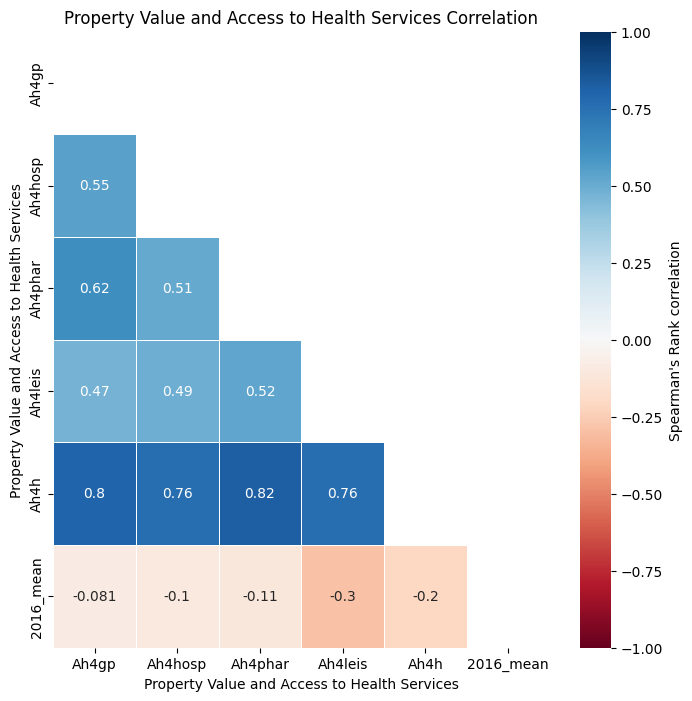

In [32]:
#Visualize spearmans correlation

# define plot size
fig,ax = plt.subplots(figsize=(8,8))

# define mask to apply to upper right hand corner of the plot
data_to_mask = np.triu(np.ones_like(health_prop_corr))

# define axis labels
x_axis_labels = health_prop_corr.columns
y_axis_labels = health_prop_corr.index


#capatlise each label is x and Y
x_axis_labels = [element.capitalize() for element in x_axis_labels]
y_axis_labels = [element.capitalize() for element in y_axis_labels]

# plot a heatmap of the correlation
sns.heatmap(health_prop_corr,
            #exband linewith for clarity
            linewidths=.5,
            # include spearmans value in squares
            annot=True,
            # define colourmap
            cmap='RdBu',
            # define value of minimum colour on cbar
            vmin=-1,
            # define value of maximum colour on cbar
            vmax=1,
            # add the mask
            mask=data_to_mask,
            # use the custom labels
            xticklabels=x_axis_labels,
            yticklabels=y_axis_labels,
            # add a label to the cbar
            cbar_kws={'label': "Spearman's Rank correlation"},
            # plot on the axis we defined
            ax=ax)

# Set axis labels
ax.set(xlabel="Property Value and Access to Health Services",
       ylabel="Property Value and Access to Health Services",
      title ='Property Value and Access to Health Services Correlation' );


**CLUSTERING OF DATA THROUGH K-MEANS CLUSTERING**

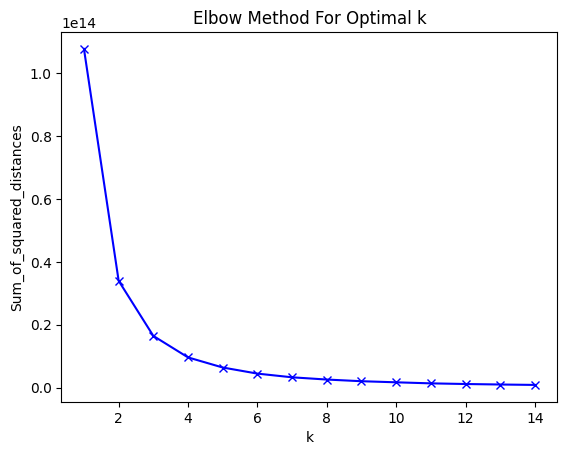

In [96]:
#Decide on number of clusters through elbow method
# create an empty list
Sum_of_squared_distances = []

# get a range of numbers from 1 to 15
K = range(1,15)
#for each number in the range 1 to 15 create a k-means model with that number of clusters and set a random state
for k in K:
    km = cluster.KMeans(n_clusters=k, init="random", random_state=123)
    # fit the model using the variables from health_prop_clean
    km = km.fit(health_prop_clean_trim[['ah4gp', 'ah4hosp', 'ah4phar', 'ah4leis', 'ah4h','2016_mean']].values)
    # calculate the sum of the squared distances and add this to the 'Sum_of_squared_distances' list
    Sum_of_squared_distances.append(km.inertia_)

# plot the sum of squared distances against the number of clusters
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [97]:
# run the model with minimum needed for minimal change in this instance 4
km4 = cluster.KMeans(n_clusters=4,init="random", random_state=123)
km4cls = km4.fit(health_prop_clean_trim[['ah4gp', 'ah4hosp', 'ah4phar', 'ah4leis', 'ah4h','2016_mean']].values)


In [98]:
km4cls.labels_

array([3, 3, 0, ..., 3, 3, 3], dtype=int32)

In [102]:
health_prop_clean_trim['cluster'] = km4cls.labels_
health_prop_clean_trim['cluster'].head()

/tmp/ipython-input-102-3274100256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_prop_clean_trim['cluster'] = km4cls.labels_


2    3
3    3
4    0
5    0
6    3
Name: cluster, dtype: int32

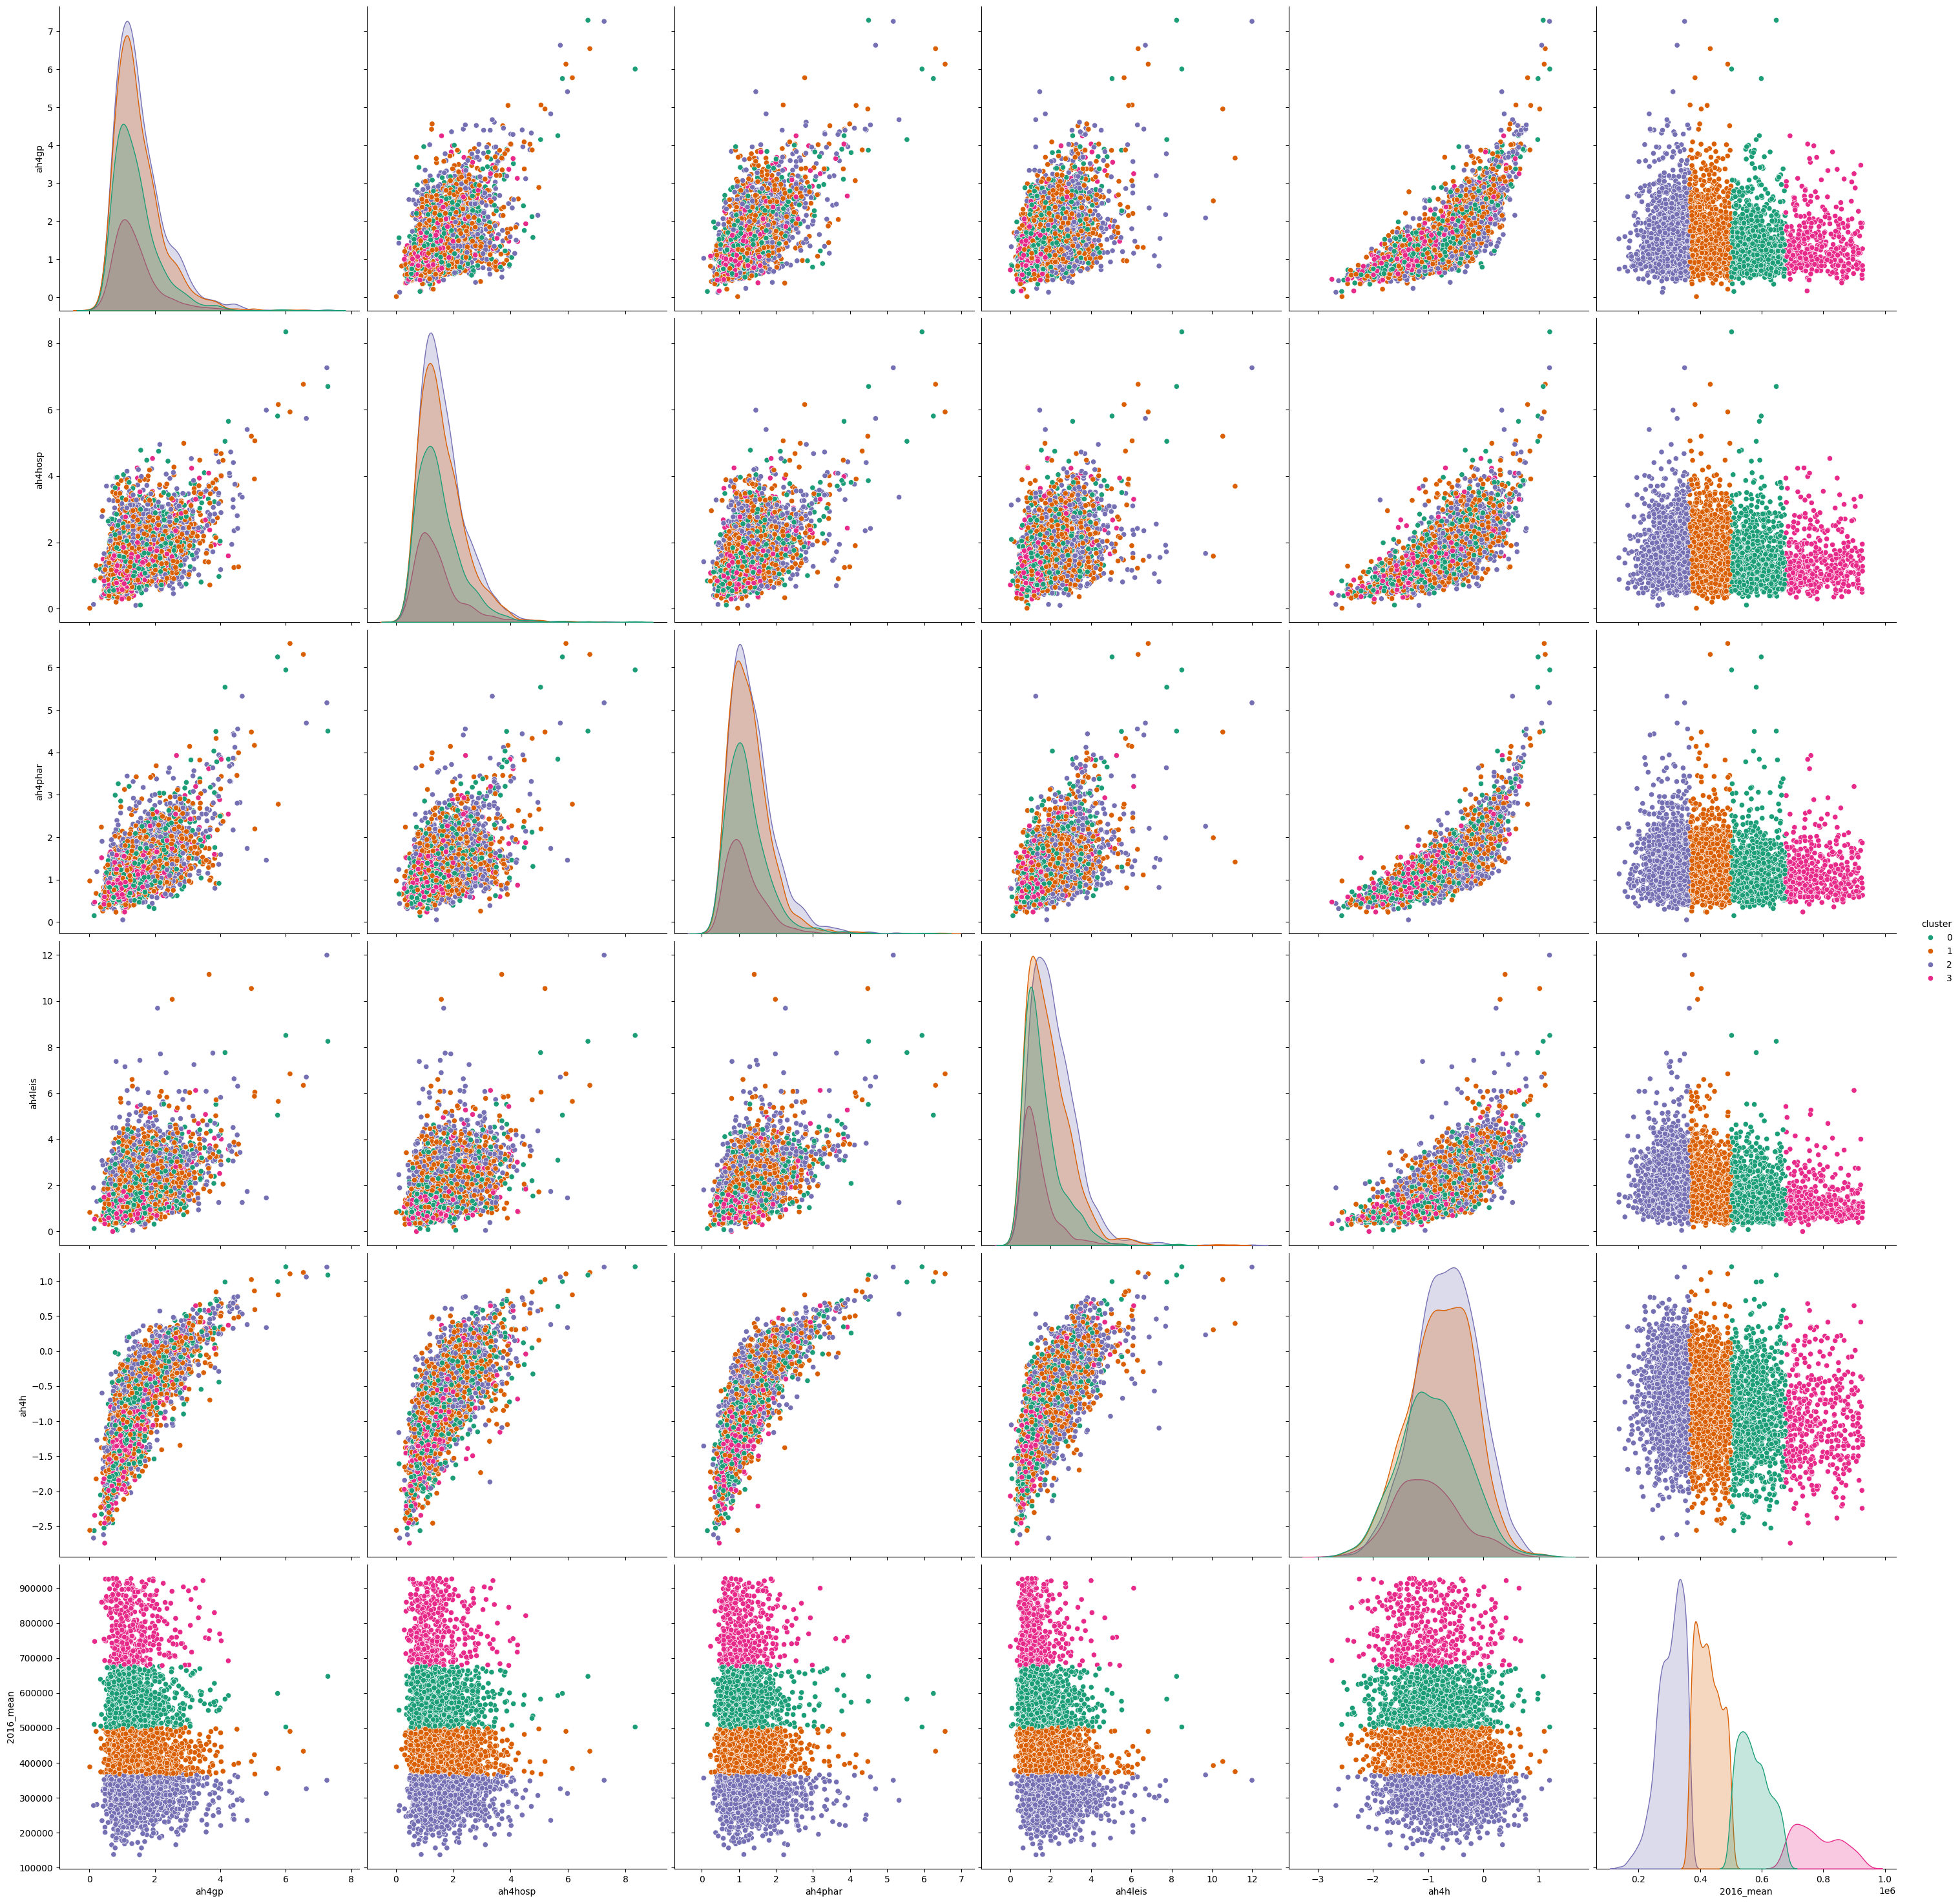

In [103]:
# Create a pairplot which shows relationship between variables captured by clustering
sns.pairplot(health_prop_clean_trim[['ah4gp', 'ah4hosp', 'ah4phar', 'ah4leis', 'ah4h','2016_mean','cluster']],
             hue='cluster',
             palette='Dark2',
            height=5);

In [109]:
# groupby to get the median value of each variable by cluster
health_prop_cluster_median=health_prop_clean_trim.groupby('cluster')[['ah4gp', 'ah4hosp', 'ah4phar', 'ah4leis', 'ah4h','2016_mean']].median().reset_index()

In [110]:
health_prop_cluster_median

cluster    ah4gp  ah4hosp  ah4phar  ah4leis    ah4h   2016_mean
0        0  1.26725  1.33800  1.11340   1.3130 -0.9122  568281.250
1        1  1.32550  1.44475  1.18915   1.6499 -0.7390  423809.375
2        2  1.36320  1.47990  1.22585   1.9331 -0.6474  312061.875
3        3  1.25990  1.24250  1.04330   1.1067 -1.0534  767487.500

In [119]:
# transform data to a long format to plot
health_prop_cluster_median_to_plot =pd.melt(health_prop_cluster_median,id_vars='cluster',
                                            value_vars=['ah4gp', 'ah4hosp', 'ah4phar', 'ah4leis', 'ah4h','2016_mean'])

In [120]:
health_prop_cluster_median_to_plot.head()

cluster variable    value
0        0    ah4gp  1.26725
1        1    ah4gp  1.32550
2        2    ah4gp  1.36320
3        3    ah4gp  1.25990
4        0  ah4hosp  1.33800

In [ ]:
sns.catplot(health_prop_cluster_median_to_plot,
            row='cluster',
            y='variable',
            x='value',
            kind='bar',
            aspect=4,
            hue='value',
            palette='autumn')







In [ ]:
# Create a pairplot which shows relationship between variables captured by clustering
sns.pairplot(health_prop_clean[['ah4gp', 'ah4hosp', 'ah4phar', 'ah4leis', 'ah4h','2016_mean','cluster']],
             hue='cluster',
             palette='Dark2',
            height=5);

**Create Inner and Outer boruough classification**

In [33]:
#create column of inner or outer borough for additional information in visualisation
inner_london_boroughs = ('Camden', 'City of London', 'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Islington', 'Kensington and Chelsea', 'Lambeth', 'Lewisham', 'Southwark', 'Tower Hamlets', 'Wandsworth', 'Westminster')

for index, row in health_prop_clean_trim.iterrows():
  if row['LAD22NM'] in inner_london_boroughs:
    health_prop_clean_trim.loc[index, 'inner_outer'] = 'Inner Borough'
  else:
    health_prop_clean_trim.loc[index, 'inner_outer'] = 'Outer Borough'

/tmp/ipython-input-33-3333621687.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_prop_clean_trim.loc[index, 'inner_outer'] = 'Inner Borough'


In [34]:
#check inner_outer has worked correctly
num_unique_categories = health_prop_clean_trim['inner_outer'].nunique()
print(f"Number of unique categories: {num_unique_categories}")

Number of unique categories: 2


# Non Spatial Visulation

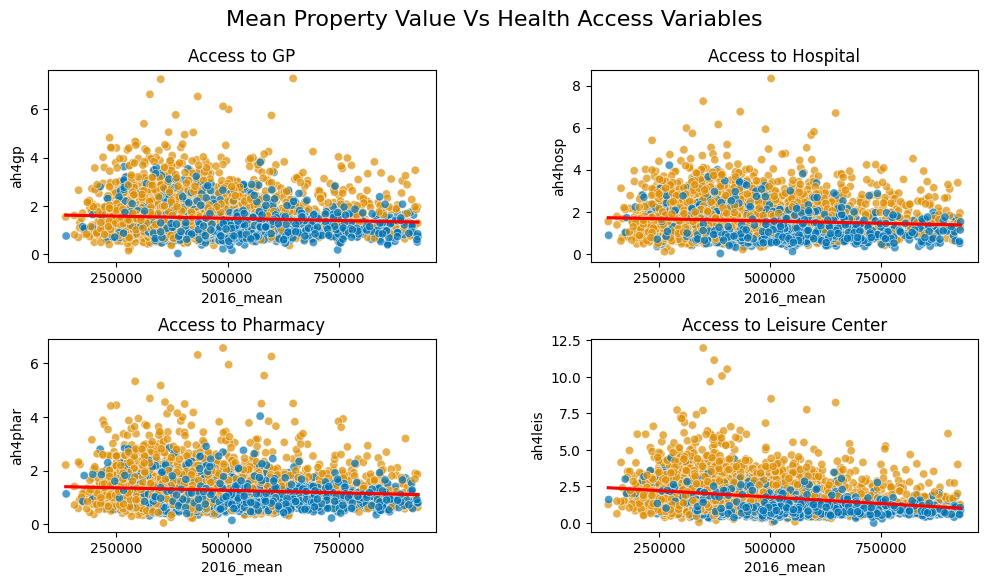

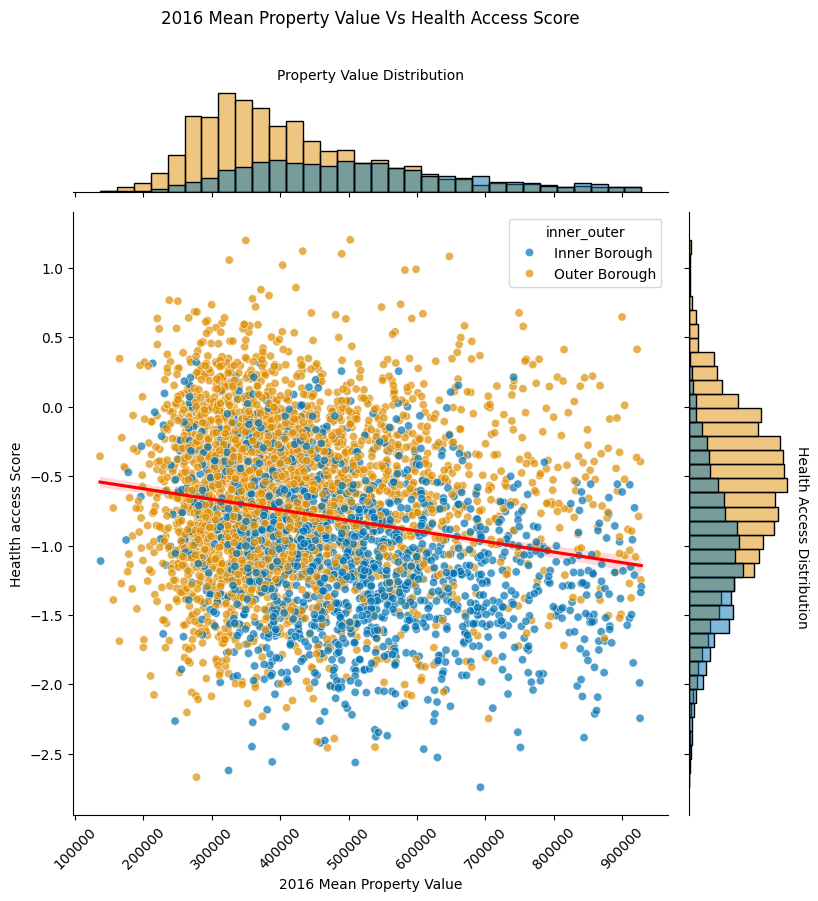

In [35]:
#create four subplots of health service individual variables
f,ax = plt.subplots(2,2, figsize=(12,6))
#widen space between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

#Add title to subplots
f.suptitle('Mean Property Value Vs Health Access Variables ', fontsize=16)


#plot distance to gp in plot 1
sns.scatterplot(data=health_prop_clean_trim, x='2016_mean', y='ah4gp', hue='inner_outer', legend=False, marker= "o", palette='colorblind', alpha =0.7, ax=ax[0,0], ).locator_params(axis='x', nbins=3)
#Add Title to plot
ax[0, 0].set_title('Access to GP')
#add regression line
sns.regplot(data=health_prop_clean_trim, x='2016_mean', y="ah4gp", scatter=False, ax=ax[0,0], color='red')



#plot distance to hospital in plot 2
sns.scatterplot(data=health_prop_clean_trim, x='2016_mean', y='ah4hosp', hue='inner_outer', legend=False, marker= "o", palette='colorblind', alpha =0.7, ax=ax[0,1]).locator_params(axis='x', nbins=3)
#Add title to plot
ax[0, 1].set_title('Access to Hospital')
#add regression line
sns.regplot(data=health_prop_clean_trim, x='2016_mean', y="ah4hosp", scatter=False, ax=ax[0,1], color='red')



#plot distance to pharmacy in plot 3
sns.scatterplot(data=health_prop_clean_trim, x='2016_mean', y='ah4phar', hue='inner_outer', legend=False,  marker= "o", palette='colorblind', alpha =0.7, ax=ax[1,0]).locator_params(axis='x', nbins=3)
#add plot title
ax[1,0 ].set_title('Access to Pharmacy')
#add regression line
sns.regplot(data=health_prop_clean_trim, x='2016_mean', y="ah4phar", scatter=False, ax=ax[1,0], color='red')

#plot distance to leisure center in plot 4
sns.scatterplot(data=health_prop_clean_trim, x='2016_mean', y='ah4leis', hue='inner_outer', legend=False,  marker= "o", palette='colorblind', alpha =0.7, ax=ax[1,1]).locator_params(axis='x', nbins=3)
#add plot title
ax[1, 1].set_title('Access to Leisure Center')
#add regression line
sns.regplot(data=health_prop_clean_trim, x='2016_mean', y="ah4leis", scatter=False, ax=ax[1,1], color='red')

#LARGE PLOT

#plot overal health access score vs property value
g=sns.JointGrid(data=health_prop_clean_trim, x='2016_mean', y='ah4h', hue="inner_outer", height =8)

#add regression line
sns.regplot(data=health_prop_clean_trim, x='2016_mean', y="ah4h", scatter=False, ax=g.ax_joint, color='red')

#remove scientific formating to include full house price
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)

#plot health access score vs property value as scatter plot
sns.scatterplot(data=health_prop_clean_trim, x='2016_mean', y='ah4h', hue='inner_outer', palette='colorblind', alpha =0.7, ax=g.ax_joint)

#plothistograms on x-axis showing distribution of house price
sns.histplot(data=health_prop_clean_trim, x='2016_mean', hue="inner_outer", palette='colorblind', ax=g.ax_marg_x)

#plot histogram on y-axis showing distribution of health access score
sns.histplot(data=health_prop_clean_trim, y='ah4h', hue="inner_outer", palette='colorblind', ax=g.ax_marg_y)

#Remove legend from axis histograms
g.ax_marg_y.legend_.remove()
g.ax_marg_x.legend_.remove()

#add title to property value distribution and set size
g.ax_marg_x.set_title('Property Value Distribution', fontsize=10)

#add title to Health Access Score distribution, set size, rotate and align to axis using x and y
g.ax_marg_y.set_title('Health Access Distribution', fontsize=10, rotation=270, y=0.3, x=1.1)

#Edit Axis Labels and set size
g.ax_joint.set_ylabel('Heatlth access Score', fontsize=10)
g.ax_joint.set_xlabel('2016 Mean Property Value', fontsize=10);

#change orientation of x-axis ticks
g.ax_joint.tick_params(axis='x', rotation=45)

#add title to map and set position and fontsize
g.ax_joint.set_title('2016 Mean Property Value Vs Health Access Score', fontsize=12, y=1.3);

# LOCAL AUTHORITY DISTRICT (LAD) VISUALISTAION

**COMBINING LAD BOUNDARY GEOMETRY AND HEALTH ACCESS Vs PROPERTY VALUE**

In [36]:
# Data downloaded from https://geoportal.statistics.gov.uk/datasets/ons::local-authority-districts-may-2024-boundaries-uk-bfe-2/explore?location=51.468470%2C-0.040938%2C9.90
shp = gpd.read_file('https://github.com/Jonathan-C-Barrett/GEOG5990M/raw/main/Local_Authority_Districts_May_2024_Boundaries_UK_BFE_2410925873296837173.geojson')



In [ ]:
#inspect data
shp.head()

In [38]:
#group property and health data by Local Authority District
health_prop_LAD = health_prop_clean.groupby('LAD22NM').mean(numeric_only=True)
health_prop_LAD.head(n=35)

ah4dent     ah4gp   ah4hosp   ah4phar   ah4leis  \
LAD22NM                                                                    
Barking and Dagenham    1.598126  1.311151  1.365741  1.327178  2.209175   
Barnet                  1.352003  1.518061  1.984389  1.329101  1.583689   
Bexley                  1.748908  1.916312  2.323867  1.519910  2.516622   
Brent                   1.299495  1.390050  1.689441  1.179907  1.878520   
Bromley                 1.826762  1.884793  2.169753  1.789389  2.266581   
Camden                  1.018297  1.134781  1.087925  0.938498  1.015850   
City of London          0.701367  1.191683  1.003900  0.734433  0.464800   
Croydon                 1.661749  1.889034  1.810304  1.520836  2.247641   
Ealing                  1.327515  1.229889  1.595108  1.190168  1.822375   
Enfield                 1.652414  1.901515  1.809367  1.531547  2.017747   
Greenwich               1.539174  1.744391  1.726023  1.360734  1.911418   
Hackney                 1.128376  1.100464  0.939054  0.907119  1.247733   
Hammersmith and Fulham  0.998156  1.124469  1.186500  0.945968  1.094183   
Haringey                1.110582  1.182472  1.635492  1.056968  1.289220   
Harrow                  1.318335  1.597124  1.832246  1.358242  2.464651   
Havering                2.184689  2.018141  2.134971  1.836399  2.815244   
Hillingdon              2.157036  1.899656  1.936081  1.654705  3.219549   
Hounslow                1.537329  1.804333  1.907940  1.569043  2.539011   
Islington               1.017676  1.075471  1.054687  0.905087  0.983993   
Kensington and Chelsea  0.889659  0.942867  1.139516  0.815139  0.809317   
Kingston upon Thames    1.362765  1.910632  1.437943  1.411446  2.198138   
Lambeth                 1.177836  1.244398  1.110081  1.056218  1.183322   
Lewisham                1.428849  1.623516  1.439759  1.272373  1.691634   
Merton                  1.333257  1.492654  1.423950  1.296436  1.881357   
Newham                  1.361556  1.233639  1.447990  1.014771  1.730991   
Redbridge               1.394688  1.489755  1.635378  1.298793  2.538446   
Richmond upon Thames    1.349200  1.646259  1.433317  1.275302  1.807775   
Southwark               1.153457  1.254139  1.176003  1.155326  1.307871   
Sutton                  1.502206  1.577918  1.564451  1.459700  1.920703   
Tower Hamlets           1.157396  1.123970  1.509864  1.034963  1.238573   
Waltham Forest          1.551170  1.285000  1.526510  1.191693  1.729828   
Wandsworth              1.060103  1.246975  1.113880  1.132268  1.157556   
Westminster             0.839267  0.960777  1.020003  0.852473  0.978949   

                            ah4h     2016_mean  
LAD22NM                                         
Barking and Dagenham   -0.696225  2.746140e+05  
Barnet                 -0.716246  5.885737e+05  
Bexley                 -0.347685  3.243487e+05  
Brent                  -0.780274  4.920600e+05  
Bromley                -0.378507  4.427177e+05  
Camden                 -1.296560  8.000290e+05  
City of London         -1.641950  7.493531e+05  
Croydon                -0.534713  3.603886e+05  
Ealing                 -0.846692  4.833447e+05  
Enfield                -0.524259  4.105975e+05  
Greenwich              -0.624037  3.684359e+05  
Hackney                -1.250390  5.265221e+05  
Hammersmith and Fulham -1.243351  7.587142e+05  
Haringey               -0.999111  5.188118e+05  
Harrow                 -0.580263  4.791505e+05  
Havering               -0.213492  3.487222e+05  
Hillingdon             -0.274319  4.090541e+05  
Hounslow               -0.476476  4.249199e+05  
Islington              -1.307727  6.167898e+05  
Kensington and Chelsea -1.498163  1.440046e+06  
Kingston upon Thames   -0.604550  5.135275e+05  
Lambeth                -1.116652  5.206402e+05  
Lewisham               -0.744147  3.958167e+05  
Merton                 -0.769630  5.482749e+05  
Newham                 -0.920996  3.264452e+05  
Redbridge              -0.665452  4.02953

In [39]:
#convert 2016 property mean to more easily comparable by dividing by /100,000
health_prop_LAD['2016_mean'] = health_prop_LAD['2016_mean']/100000
health_prop_LAD.head()


ah4dent     ah4gp   ah4hosp   ah4phar   ah4leis  \
LAD22NM                                                                  
Barking and Dagenham  1.598126  1.311151  1.365741  1.327178  2.209175   
Barnet                1.352003  1.518061  1.984389  1.329101  1.583689   
Bexley                1.748908  1.916312  2.323867  1.519910  2.516622   
Brent                 1.299495  1.390050  1.689441  1.179907  1.878520   
Bromley               1.826762  1.884793  2.169753  1.789389  2.266581   

                          ah4h  2016_mean  
LAD22NM                                    
Barking and Dagenham -0.696225   2.746140  
Barnet               -0.716246   5.885737  
Bexley               -0.347685   3.243487  
Brent                -0.780274   4.920600  
Bromley              -0.378507   4.427177

In [40]:
#explore basic statistics
health_prop_LAD.describe()

ah4dent      ah4gp    ah4hosp    ah4phar    ah4leis       ah4h  \
count  33.000000  33.000000  33.000000  33.000000  33.000000  33.000000   
mean    1.355739   1.452918   1.520347   1.240065   1.750378  -0.849673   
std     0.338403   0.323215   0.369973   0.278643   0.638477   0.368234   
min     0.701367   0.942867   0.939054   0.734433   0.464800  -1.641950   
25%     1.128376   1.191683   1.176003   1.034963   1.238573  -1.116652   
50%     1.349200   1.390050   1.509864   1.272373   1.807775  -0.780274   
75%     1.539174   1.744391   1.809367   1.411446   2.209175  -0.604550   
max     2.184689   2.018141   2.323867   1.836399   3.219549  -0.213492   

       2016_mean  
count  33.000000  
mean    5.375976  
std     2.323529  
min     2.746140  
25%     4.029531  
50%     4.833447  
75%     5.885737  
max    14.400460

In [41]:
#Cobine property and Health access data with geoson LAD boundaries and check all 33 Boroughs present
health_prop_LAD_ldn = pd.merge(shp, health_prop_LAD, left_on='LAD24NM', right_on='LAD22NM', how='right')
health_prop_LAD_ldn.head(n=35)

FID    LAD24CD                 LAD24NM LAD24NMW   BNG_E   BNG_N      LONG  \
0   265  E09000002    Barking and Dagenham           547757  185111  0.129479   
1   266  E09000003                  Barnet           523473  191752 -0.218190   
2   267  E09000004                  Bexley           549202  175434  0.146212   
3   268  E09000005                   Brent           519615  186465 -0.275680   
4   269  E09000006                 Bromley           542036  165707  0.039246   
5   270  E09000007                  Camden           527491  184283 -0.162910   
6   264  E09000001          City of London           532382  181358 -0.093510   
7   271  E09000008                 Croydon           533922  164745 -0.077610   
8   272  E09000009                  Ealing           517055  181959 -0.314100   
9   273  E09000010                 Enfield           532831  196198 -0.081440   
10  274  E09000011               Greenwich           542507  175878  0.050093   
11  275  E09000012                 Hackney           534560  185787 -0.060450   
12  276  E09000013  Hammersmith and Fulham           523867  177993 -0.217350   
13  277  E09000014                Haringey           531260  189349 -0.106700   
14  278  E09000015                  Harrow           515359  189736 -0.335980   
15  279  E09000016                Havering           555032  187514  0.235368   
16  280  E09000017              Hillingdon           508168  183121 -0.441790   
17  281  E09000018                Hounslow           512737  174959 -0.378550   
18  282  E09000019               Islington           531160  184645 -0.109890   
19  283  E09000020  Kensington and Chelsea           525756  179054 -0.189780   
20  284  E09000021    Kingston upon Thames           519508  167389 -0.283670   
21  285  E09000022                 Lambeth           531118  175629 -0.113850   
22  286  E09000023                Lewisham           537888  173343 -0.017340   
23  287  E09000024                  Merton           526068  169508 -0.188680   
24  288  E09000025                  Newham           540713  183346  0.027261   
25  289  E09000026               Redbridge           543512  189477  0.070085   
26  290  E09000027    Richmond upon Thames           519005  172650 -0.289140   
27  291  E09000028               Southwark           533945  175869 -0.073080   
28  292  E09000029                  Sutton           527357  163639 -0.172260   
29  293  E09000030           Tower Hamlets           536340  181452 -0.036470   
30  294  E09000031          Waltham Forest           537328  190278 -0.018800   
31  295  E09000032              Wandsworth           525152  174138 -0.200210   
32  296  E09000033             Westminster           528268  180871 -0.152950   

        LAT                                           geometry   ah4dent  \
0   51.5456  POLYGON ((0.1481 51.59653, 0.14807 51.59636, 0...  1.598126   
1   51.6111  POLYGON ((-0.19987 51.67017, -0.19968 51.66986...  1.352003   
2   51.4582  POLYGON ((0.15928 51.50871, 0.15997 51.50869, ...  1.748908   
3   51.5644  POLYGON ((-0.26482 51.59827, -0.2647 51.59817,...  1.299495   
4   51.3727  POLYGON ((0.03059 51.44432, 0.03063 51.4443, 0...  1.826762   
5   51.5430  POLYGON ((-0.16598 51.57274, -0.16589 51.57272...  1.018297   
6   51.5156  POLYGON ((-0.09669 51.52319, -0.09668 51.52317...  0.701367   
7   51.3660  POLYGON ((-0.11136 51.42317, -0.11093 51.42315...  1.661749   
8   51.5244  POLYGON ((-0.34553 51.55843, -0.34551 51.55843...  1.327515   
9   51.6489  POLYGON ((-0.10576 51.69188, -0.10574 51.69182...  1.652414   
10  51.4639  POLYGON ((0.12039 51.51128, 0.12046 51.51119, ...  1.539174   
11  51.5549  POLYGON ((-0.06116 51.57779, -0.0609 51.57734,...  1.128376   
12  51.4873  POLYGON ((-0.23311 51.53193, -0.23296 51.53183...  0.998156   
13  51.5877  POLYGON ((-0.12734 51.60939, -0.12705 51.60938...  1.110582   
14  51.5947  POLYGON ((-0.30542 51.63338, -0.3054 51.63332,...  1.318335   
15  51.5652  POLYGON ((0.23214 51

In [ ]:
#check data on leaflet map
health_prop_LAD_ldn.explore()

**EXPLORE CORRELATION AT LAD SCALE**

In [42]:
#Examine correlation between data at LAD level using Spearmans rank
health_prop_LADcorr = health_prop_LAD_ldn[['ah4gp', 'ah4hosp', 'ah4phar', 'ah4leis', 'ah4h','2016_mean']].corr(method = 'spearman')
health_prop_LADcorr

ah4gp   ah4hosp   ah4phar   ah4leis      ah4h  2016_mean
ah4gp      1.000000  0.751671  0.935829  0.850936  0.931484  -0.624332
ah4hosp    0.751671  1.000000  0.836898  0.799799  0.876337  -0.635695
ah4phar    0.935829  0.836898  1.000000  0.918115  0.978610  -0.674131
ah4leis    0.850936  0.799799  0.918115  1.000000  0.953877  -0.757353
ah4h       0.931484  0.876337  0.978610  0.953877  1.000000  -0.744987
2016_mean -0.624332 -0.635695 -0.674131 -0.757353 -0.744987   1.000000

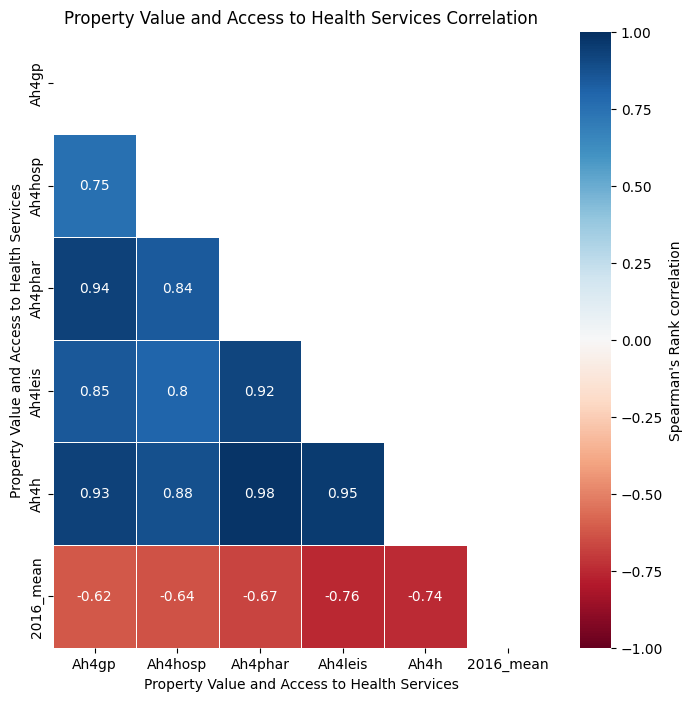

In [43]:
#visualise correlation
# define plot size
fig,ax = plt.subplots(figsize=(8,8))

# define mask to apply to upper right hand corner of the plot
data_to_mask = np.triu(np.ones_like(health_prop_LADcorr))

# define axis labels
x_axis_labels = health_prop_LADcorr.columns
y_axis_labels = health_prop_LADcorr.index


#capatlise each label is x and Y
x_axis_labels = [element.capitalize() for element in x_axis_labels]
y_axis_labels = [element.capitalize() for element in y_axis_labels]

# plot a heatmap of the correlation
sns.heatmap(health_prop_LADcorr,
            #exband linewith for clarity
            linewidths=.5,
            # include spearmans value in sqaures
            annot=True,
            # define colourmap
            cmap='RdBu',
            # define value of minimum colour on cbar
            vmin=-1,
            # define value of maximum colour on cbar
            vmax=1,
            # add the mask
            mask=data_to_mask,
            # use the custom labels
            xticklabels=x_axis_labels,
            yticklabels=y_axis_labels,
            # add a label to the cbar
            cbar_kws={'label': "Spearman's Rank correlation"},
            # plot on the axis we defined
            ax=ax)

# Set axis labels
ax.set(xlabel="Property Value and Access to Health Services",
       ylabel="Property Value and Access to Health Services",
      title ='Property Value and Access to Health Services Correlation' );


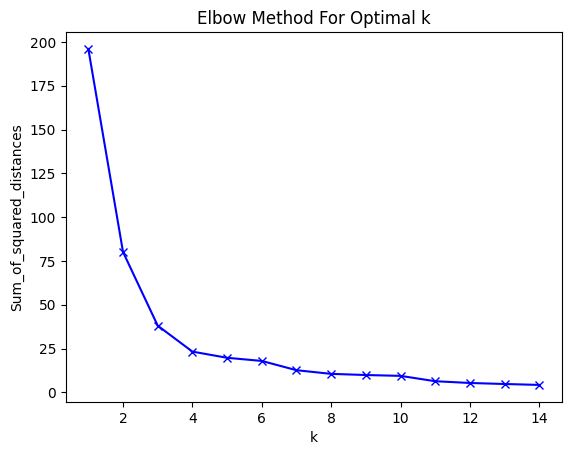

In [44]:
#Decide on number of clusters through elbow method
# create an empty list
Sum_of_squared_distances = []

# get a range of numbers from 1 to 15
K = range(1,15)
#for each number in the range 1 to 15create a k-means model with that number of clusters and set a random state
for k in K:
    km = cluster.KMeans(n_clusters=k, init="random", random_state=123)
    # fit the model using the variables from database
    km = km.fit(health_prop_LAD_ldn[['ah4gp', 'ah4hosp', 'ah4phar', 'ah4leis','2016_mean']].values)
    # calculate the sum of the squared distances and add this to the 'Sum_of_squared_distances' list
    Sum_of_squared_distances.append(km.inertia_)

# plot the sum of squared distances against the number of clusters
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [45]:
# run the model with minimum needed for minimal change in this instance 4
km4 = cluster.KMeans(n_clusters=4,init="random", random_state=123)
km4cls = km4.fit(health_prop_LAD_ldn[['ah4gp', 'ah4hosp', 'ah4phar', 'ah4leis','2016_mean']].values)

In [46]:
#create a new column in db with cluster label
health_prop_LAD_ldn['cluster'] = km4cls.labels_
health_prop_LAD_ldn['cluster'].head()

0    3
1    1
2    3
3    1
4    3
Name: cluster, dtype: int32

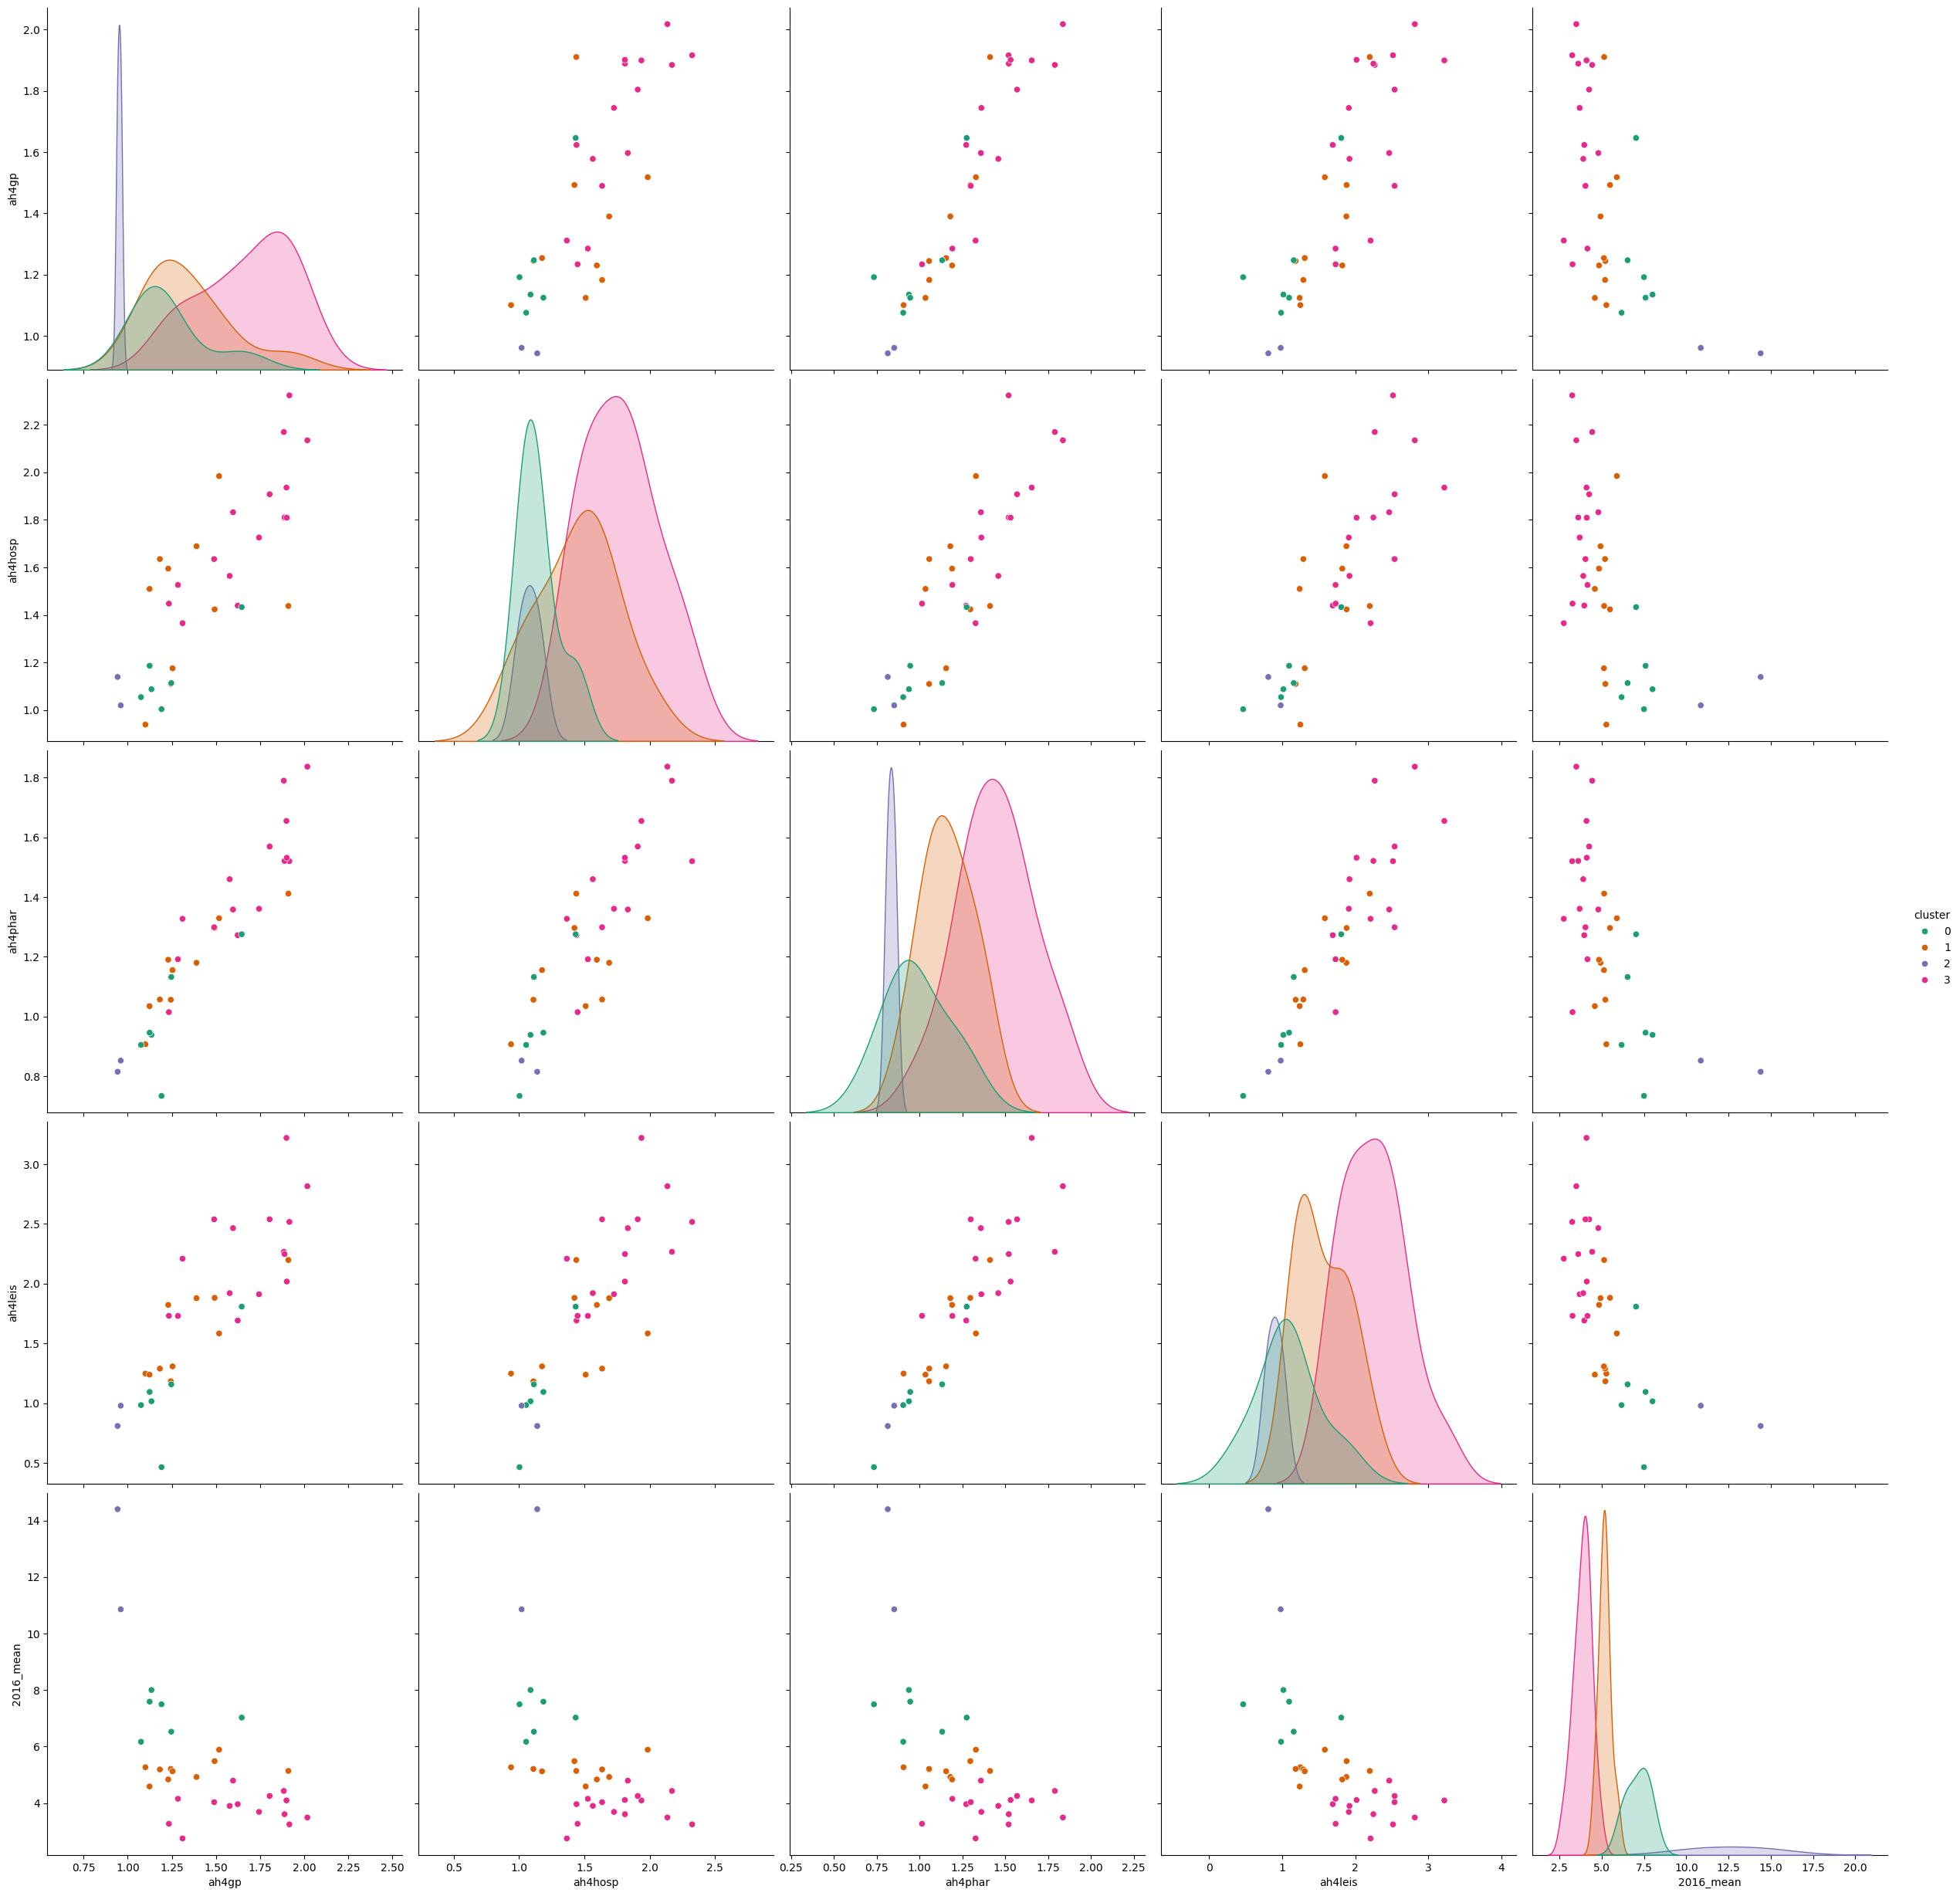

In [47]:
# Create a pairplot which shows relationship between variables captured by clustering
sns.pairplot(health_prop_LAD_ldn[['ah4gp', 'ah4hosp', 'ah4phar', 'ah4leis','2016_mean','cluster']],
             hue='cluster',
             palette='Dark2',
            height=5);

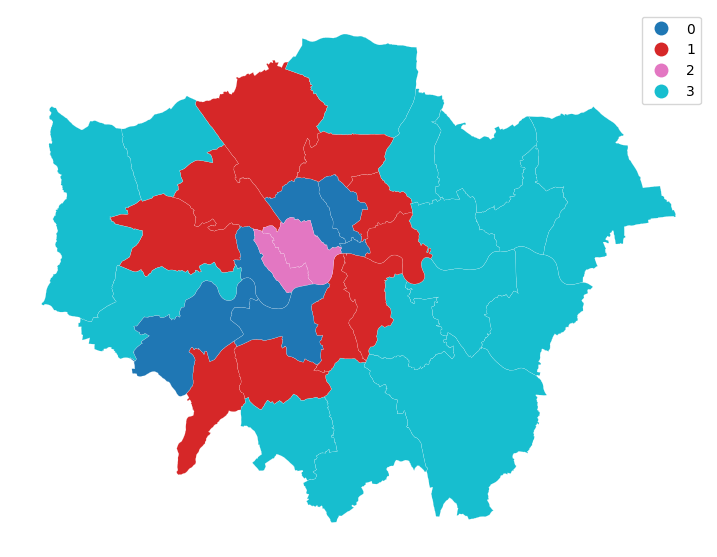

In [48]:
#Plot the spatial pattern of these clusters
f, ax = plt.subplots(1, figsize=(9, 9))

health_prop_LAD_ldn.plot(column='cluster', categorical=True, legend=True, \
         linewidth=0.1, edgecolor='white', ax=ax)

ax.set_axis_off()

plt.show()

In [49]:
#groupby cluster to get the median value of each variable by cluster
health_prop_LAD_clusters_median=health_prop_LAD_ldn.groupby('cluster')[['ah4gp', 'ah4hosp', 'ah4phar', 'ah4leis','2016_mean']].median().reset_index()

In [50]:
#explore median values
health_prop_LAD_clusters_median

cluster     ah4gp   ah4hosp   ah4phar   ah4leis  2016_mean
0        0  1.163232  1.100903  0.942233  1.055016   7.258550
1        1  1.249268  1.473903  1.167616  1.445780   5.161697
2        2  0.951822  1.079759  0.833806  0.894133  12.627896
3        3  1.744391  1.809367  1.459700  2.247641   3.958167

In [58]:
# transform data to a long format to plot
health_prop_LAD_clusters_median_to_plot =pd.melt(health_prop_LAD_clusters_median,id_vars='cluster',
                                            value_vars=['ah4gp', 'ah4hosp', 'ah4phar', 'ah4leis','2016_mean'])

In [59]:
# check what the data now look like
health_prop_LAD_clusters_median_to_plot.head()

cluster variable     value
0        0    ah4gp  1.163232
1        1    ah4gp  1.249268
2        2    ah4gp  0.951822
3        3    ah4gp  1.744391
4        0  ah4hosp  1.100903

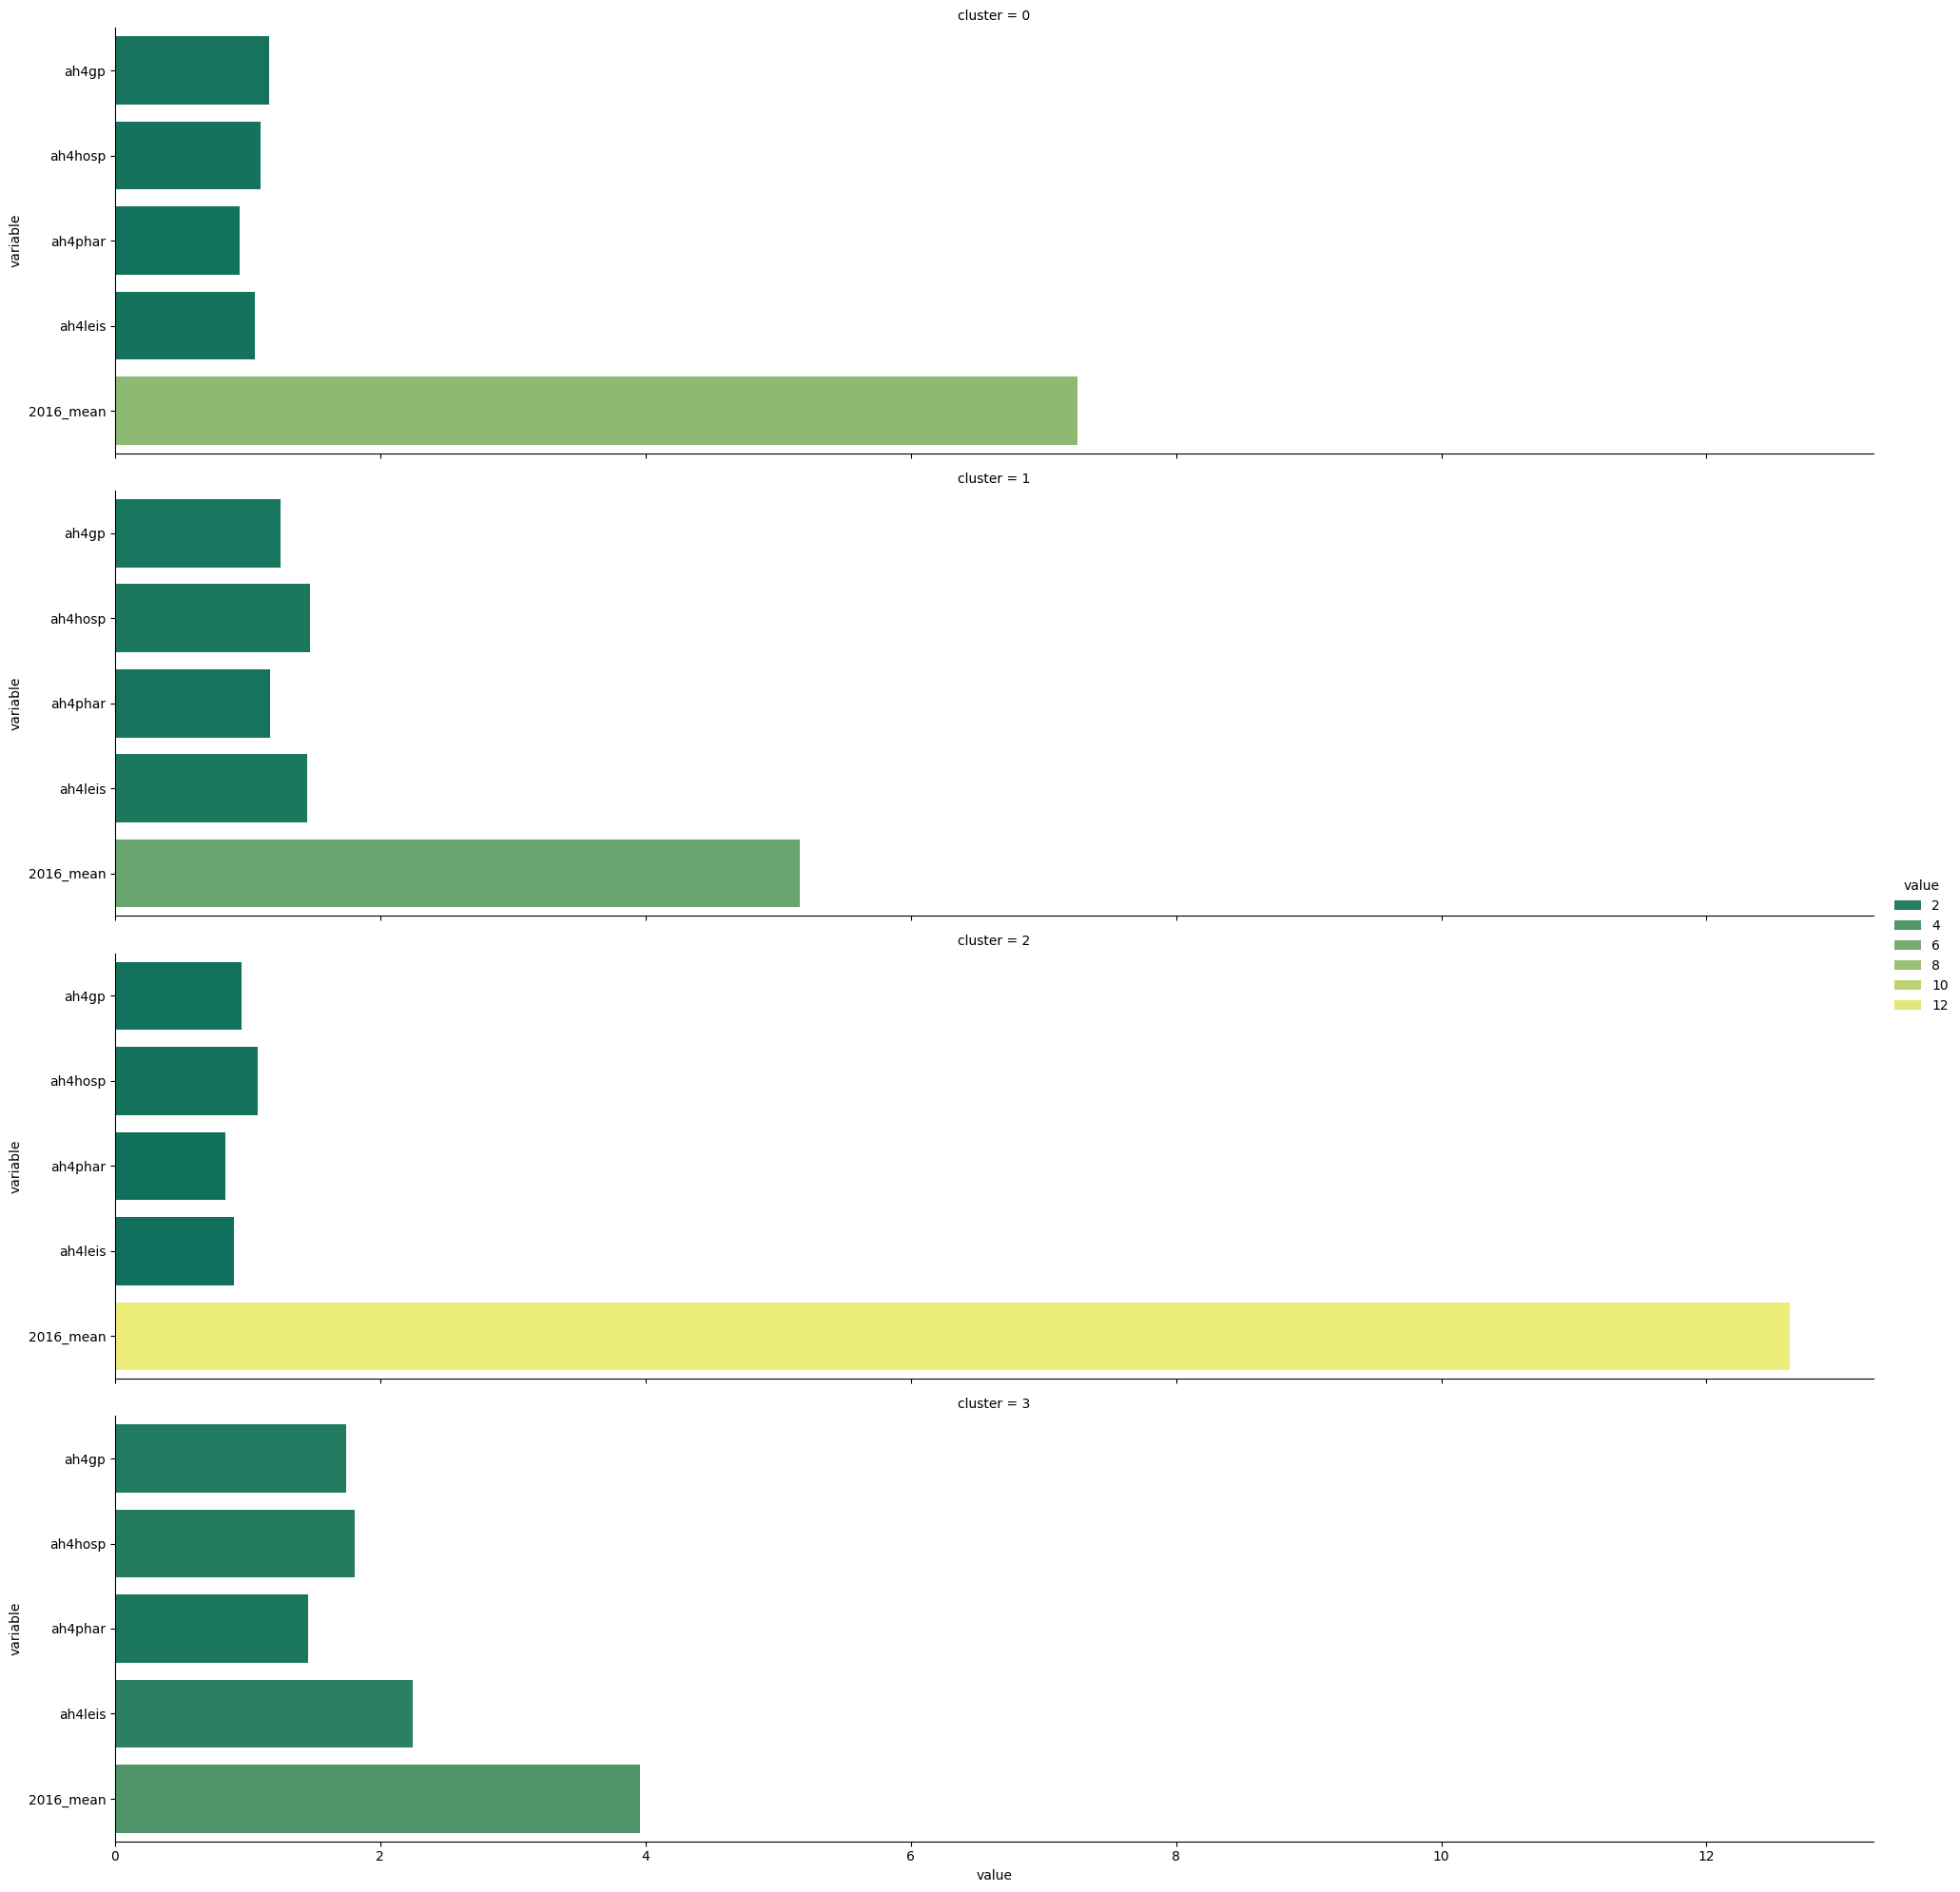

In [61]:
# Plot a faceted bar chart, where each row is a different cluster

sns.catplot(health_prop_LAD_clusters_median_to_plot,
            row='cluster',
            y='variable',
            x='value',
            kind='bar',
            aspect=4,
            hue='value',
            palette='summer')



This is an example block of mardown text I want to reference <a href="#ref1">[1]</a>. I might need to add some more citations <a href="#ref2">[2]</a><a href="#ref2">[3]</a>



Data Visualisation
- Don't forget to present your final two data visualisation (one spatial and one non-spatial) and the justifications about the decisions you made whilst preparing and visualising the data.

## References
<p><a href="add_url_here">[1]</a>Footnote citation goes here</p>
<p><a href="https://github.com/FrancescaPontin/GEOG5990">[2]</a>GEOG5990M course materials</p>
<p><a href="add_url_here">[3]</a>Citation 3</p>